NOMBRE:

APELLIDOS:

GRUPO:

# Tercera prueba de evaluacion **continua**

### Ejercicio 1

x**3 + exp(x)*log(x) - 2

Número de iteraciones realizadas:  5
Aproximación de la raíz:  1.1552529193767285


array([1.5       , 1.22374044, 1.15850805, 1.15526062, 1.15525292,
       1.15525292, 0.        , 0.        , 0.        , 0.        ])

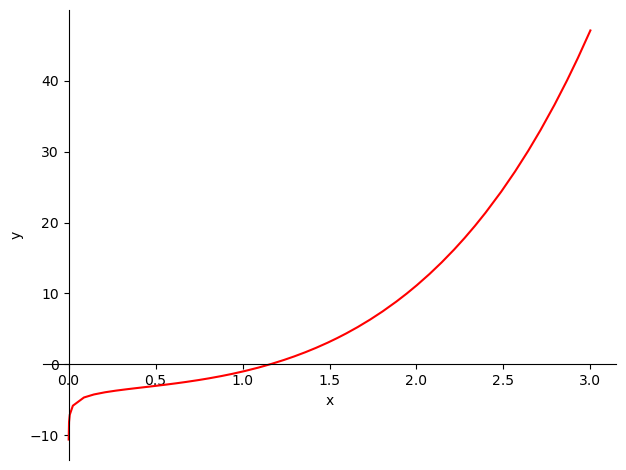

In [47]:
#Método de Newton-Raphson

import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x

f_expr = sp.E**x * sp.ln(x) + x**3 - 2 # Expresion con la que se evalua el metodo
display(f_expr)
f_der_expr = sp.diff(f_expr,x)

f = sp.lambdify(x,f_expr)
f_der = sp.lambdify(x,f_der_expr)

N_max = 10 # Numero maximo de repeticiones
tol = 1.e-9 # Tolerancia minima a la que tiene que llegar el metodo
x0 = 1.5 # Punto por le que se comienza la aproximacion

x_aprox = np.zeros(N_max)
x_aprox[0] = x0

for k in range(1,N_max):
    if ( np.abs( f_der(x_aprox[k-1]) ) < 1.e-14 ): break

    x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/f_der(x_aprox[k-1])

    if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k) 
print('Aproximación de la raíz: ', x_aprox[k])
display(x_aprox)#Saca todas la iteraciones

p = sp.plot(f_expr, (x, -1, 3), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.show()

### Ejercicio 2

exp(-x**2)

-2*x*exp(-x**2)

2*(2*x**2 - 1)*exp(-x**2)

4*x*(3 - 2*x**2)*exp(-x**2)

0
Los puntos de inflexion son: -2.00000000000000
1


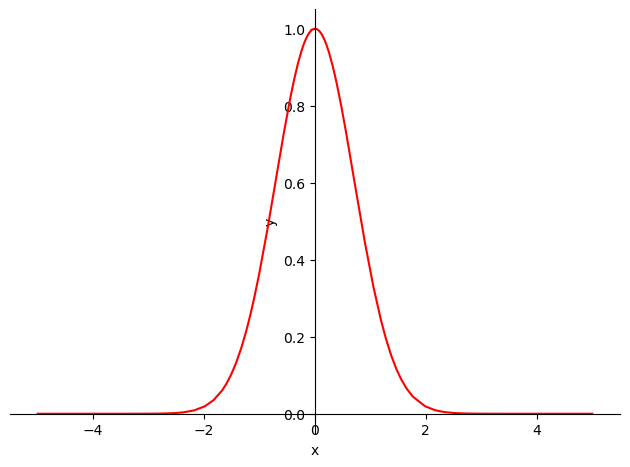

In [37]:
import sympy as sp 

x = sp.Symbol('x', real=True)

fExpr = sp.E**-x**2
display(fExpr)

fExprDiff1 = sp.diff(fExpr, x, 1)
fExprDiff2 = sp.diff(fExpr, x, 2)
fExprDiff3 = sp.diff(fExpr, x, 3)

display(fExprDiff1)
display(fExprDiff2)
display(fExprDiff3)

print(fExprDiff1.subs(x, 0))
puntosInflexion = fExprDiff1.evalf(subs={x: 0})
puntosInflexion = fExprDiff2.evalf(subs={x: 0})
print(f"Los puntos de inflexion son: {puntosInflexion}")

print(sp.E**-0**2)

p = sp.plot(fExpr, (x, -5, 5), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.show()

### Ejercicio 3

-2*x*(t - x)**3*(2*x**2*cos(x**2) + 3*sin(x**2))/3 + 2*x*(t - x)*cos(x**2) + (t - x)**2*(-2*x**2*sin(x**2) + cos(x**2)) + sin(x**2)

Polinomio de Taylor de orden 1: 
 2*(x - 1)*cos(1) + sin(1) 
 Resto de Taylor de orden 1: 
 (x - 1)**2*(-2*t**2*sin(t**2) + cos(t**2)) 

Aproximación de sin(0.9^2) con el polinomio de Taylor de orden 1:  0.7334105236342686
Polinomio de Taylor de orden 2: 
 (x - 1)**2*(-2*sin(1) + cos(1)) + 2*(x - 1)*cos(1) + sin(1) 
 Resto de Taylor de orden 1: 
 -2*t*(x - 1)**3*(2*t**2*cos(t**2) + 3*sin(t**2))/3 

Aproximación de sin(0.9^2) con el polinomio de Taylor de orden 2:  0.721984126996792
Polinomio de Taylor de orden 3: 
 (x - 1)**3*(-2*sin(1) - 4*cos(1)/3) + (x - 1)**2*(-2*sin(1) + cos(1)) + 2*(x - 1)*cos(1) + sin(1) 
 Resto de Taylor de orden 2: 
 (x - 1)**4*(2*t**4*sin(t**2)/3 - 2*t**2*cos(t**2) - sin(t**2)/2) 

Aproximación de sin(0.9^2) con el polinomio de Taylor de orden 3:  0.7243874720408987
ptos_criticos_R2:  []
Cota del error:  0.00240334504410664


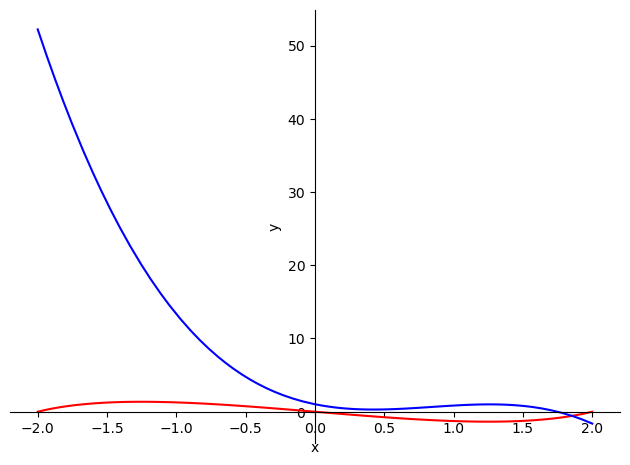

In [45]:
#Teorema de Taylor

import sympy as sp
import numpy as np

x, t = sp.symbols('x, t', real =True)

# Importamos la function que calcula el polinomio y el resto de Taylor
def taylor(f_exp,x0,n):
    p_exp = 0
    for i in range(n+1):
        p_exp += sp.diff(f_exp,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i
        
    R_exp = sp.diff(f_exp,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1)
    return p_exp,R_exp

#Los datos

x0 = 1  # punto en el que centramos el polinomio de Taylor
f_exp = sp.sin(x**2) # función que queremos aproximar
f_exp_diff1 = sp.diff(f_exp, x, 1)
f_exp_diff2 = sp.diff(f_exp, x, 2)
f_exp_diff3 = sp.diff(f_exp, x, 3)
taylor3 = f_exp + f_exp_diff1 / sp.factorial(1) * (t - x) + f_exp_diff2 / sp.factorial(2) * (t - x)**2 + f_exp_diff3 / sp.factorial(3) * (t - x)**3

display(taylor3)

# calculamos el Polinomio de Taylor de orden 1 centrado en x0
n = 1 #orden

P1_exp, R1_exp = taylor(f_exp,x0,n)
print('Polinomio de Taylor de orden 1: \n',P1_exp,'\n Resto de Taylor de orden 1: \n',R1_exp,'\n')

# Creamos una función sp.lambdify del polinomio 
P1 = sp.lambdify (x,P1_exp)
print('Aproximación de sin(0.9^2) con el polinomio de Taylor de orden 1: ', P1(0.9))

# calculamos el Polinomio de Taylor de orden 2 centrado en x0
n = 2 

P2_exp, R2_exp = taylor(f_exp,x0,n)
print('Polinomio de Taylor de orden 2: \n',P2_exp,'\n Resto de Taylor de orden 1: \n',R2_exp,'\n')

# Creamos una función sp.lambdify del polinomio 
P2 = sp.lambdify (x,P2_exp)
print('Aproximación de sin(0.9^2) con el polinomio de Taylor de orden 2: ', P2(0.9))

R2_exp_xfijo = R2_exp.subs({x:0.9})
R2 = sp.Lambda (t, R2_exp_xfijo)

# calculamos el Polinomio de Taylor de orden 3 centrado en x0
n = 3

P3_exp, R3_exp = taylor(f_exp,x0,n)
print('Polinomio de Taylor de orden 3: \n',P3_exp,'\n Resto de Taylor de orden 2: \n',R3_exp,'\n')

# Creamos una función sp.lambdify del polinomio 
P3 = sp.lambdify (x,P3_exp)
print('Aproximación de sin(0.9^2) con el polinomio de Taylor de orden 3: ', P3(0.9))

R3_exp_xfijo = R3_exp.subs({x:0.9})
R3 = sp.Lambda (t, R3_exp_xfijo)

#Comprobamos que R2 no tiene puntos críticos
ptos_criticos_R2 = sp.solve (sp.diff(R2,x))
print('ptos_criticos_R2: ',ptos_criticos_R2)

# Elegimos el máximo de R2, en valor absoluto, comparando sus valores en los extremos del intervalo
cota_error = sp.Max( sp.Abs(R2(1.)), sp.Abs(R2(0.9)) )

print('Cota del error: ',cota_error)

p = sp.plot(fExpr, P3_exp, (x, -2, 2), show=False)
p[0].line_color='r'
p[1].line_color='b'
p.xlabel='x'
p.ylabel='y'
p.show()

### Ejercicio 4

In [43]:
import sympy as sp 

x = sp.Symbol('x', real = True)
fExpr = (x**2 - 1) * sp.tan((sp.pi * x) / 2) 

display(fExpr)

display(sp.limit(fExpr, x, 1, dir='-'))
display(sp.limit((x**2 - 1), x, 1, dir='-'))
display(sp.limit(sp.tan((x*sp.pi) / 2), x, 1, dir='-'))

fExprDiff1 = sp.diff(fExpr, x, 1)
display(fExprDiff1)
display(sp.limit(fExprDiff1, x, 1, dir='-'))

fExprDiff11 = sp.diff(x**2 -1, x, 1)
fExprDiff12 = sp.diff(sp.tan((sp.pi * x) / 2), x, 1)

display(sp.limit(fExprDiff11 * fExprDiff12, x, 1, dir='-'))

(x**2 - 1)*tan(pi*x/2)

-4/pi

0

oo

2*x*tan(pi*x/2) + pi*(x**2 - 1)*(tan(pi*x/2)**2 + 1)/2

-2/pi

oo